# Content
#### This dataset contains the details of COVID 19 in Indian states until 07/07/2021.
#### The dataset contains 16850 rows and 9 columns. Out of the 9 columns 1 column is categorical 3 columns are numeric.

### Import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

### Read and view data

In [2]:
d=pd.read_csv("D:/Data Analytics/EDA/Covid Details in India.csv")
d

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
16845,16846,2021-07-07,8:00 AM,Telangana,-,-,613124,3703,628282
16846,16847,2021-07-07,8:00 AM,Tripura,-,-,63964,701,68612
16847,16848,2021-07-07,8:00 AM,Uttarakhand,-,-,332006,7338,340882
16848,16849,2021-07-07,8:00 AM,Uttar Pradesh,-,-,1682130,22656,1706818


### Set Index As Sno 

In [3]:
d=d.set_index("Sno")
d

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Sno,,,,,,,,
1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...
16846,2021-07-07,8:00 AM,Telangana,-,-,613124,3703,628282
16847,2021-07-07,8:00 AM,Tripura,-,-,63964,701,68612
16848,2021-07-07,8:00 AM,Uttarakhand,-,-,332006,7338,340882


### Renaming Columns 

In [4]:
d.rename(columns={'State/UnionTerritory':'State','ConfirmedIndianNational':'ConfirmedIndian','ConfirmedForeignNational':'ConfirmedForeign'},inplace=True)
d

,Date,Time,State,ConfirmedIndian,ConfirmedForeign,Cured,Deaths,Confirmed
Sno,,,,,,,,
1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...
16846,2021-07-07,8:00 AM,Telangana,-,-,613124,3703,628282
16847,2021-07-07,8:00 AM,Tripura,-,-,63964,701,68612
16848,2021-07-07,8:00 AM,Uttarakhand,-,-,332006,7338,340882


### Top 5 Rows 

In [5]:
d.head()

,Date,Time,State,ConfirmedIndian,ConfirmedForeign,Cured,Deaths,Confirmed
Sno,,,,,,,,
1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


### Bottom 5 Rows 

In [6]:
d.tail()

,Date,Time,State,ConfirmedIndian,ConfirmedForeign,Cured,Deaths,Confirmed
Sno,,,,,,,,
16846,2021-07-07,8:00 AM,Telangana,-,-,613124,3703,628282
16847,2021-07-07,8:00 AM,Tripura,-,-,63964,701,68612
16848,2021-07-07,8:00 AM,Uttarakhand,-,-,332006,7338,340882
16849,2021-07-07,8:00 AM,Uttar Pradesh,-,-,1682130,22656,1706818
16850,2021-07-07,8:00 AM,West Bengal,-,-,1472132,17834,1507241


### Number of rows and columns 

In [7]:
d.shape

(16850, 8)

### Dimension of the dataset 

In [8]:
d.ndim

2


### Data type of attributes 

In [9]:
d.dtypes

Date                object
Time                object
State               object
ConfirmedIndian     object
ConfirmedForeign    object
Cured                int64
Deaths               int64
Confirmed            int64
dtype: object

### Checking for duplicated values 

In [10]:
d.duplicated()

Sno
1        False
2        False
3        False
4        False
5        False
         ...  
16846    False
16847    False
16848    False
16849    False
16850    False
Length: 16850, dtype: bool

### Sum of dulicated values if there is any 

In [11]:
d.duplicated().sum()

0

### Printing index 

In [12]:
d.index

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            16841, 16842, 16843, 16844, 16845, 16846, 16847, 16848, 16849,
            16850],
           dtype='int64', name='Sno', length=16850)

### View column names

In [13]:
d.columns

Index(['Date', 'Time', 'State', 'ConfirmedIndian', 'ConfirmedForeign', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

### Information of the dataset 

In [14]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16850 entries, 1 to 16850
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              16850 non-null  object
 1   Time              16850 non-null  object
 2   State             16850 non-null  object
 3   ConfirmedIndian   16850 non-null  object
 4   ConfirmedForeign  16850 non-null  object
 5   Cured             16850 non-null  int64 
 6   Deaths            16850 non-null  int64 
 7   Confirmed         16850 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 1.2+ MB


### Checking for missing values 

In [15]:
d.isna()

,Date,Time,State,ConfirmedIndian,ConfirmedForeign,Cured,Deaths,Confirmed
Sno,,,,,,,,
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
16846,False,False,False,False,False,False,False,False
16847,False,False,False,False,False,False,False,False
16848,False,False,False,False,False,False,False,False


### Sum of missing values if there is any 

In [16]:
d.isna().sum()

Date                0
Time                0
State               0
ConfirmedIndian     0
ConfirmedForeign    0
Cured               0
Deaths              0
Confirmed           0
dtype: int64

### Number of unique values

In [17]:
d.nunique()

Date                  525
Time                    7
State                  42
ConfirmedIndian        62
ConfirmedForeign       12
Cured               13226
Deaths               5950
Confirmed           13774
dtype: int64

### View unique states in 'State' column 

In [18]:
d.State.unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****'],
      dtype=object)

### Number of times each state appear in the dataset 

In [19]:
d.State.value_counts()

Kerala                                      525
Delhi                                       493
Rajasthan                                   492
Haryana                                     491
Uttar Pradesh                               491
Tamil Nadu                                  488
Ladakh                                      488
Karnataka                                   486
Maharashtra                                 486
Jammu and Kashmir                           486
Punjab                                      486
Andhra Pradesh                              483
Uttarakhand                                 480
Odisha                                      479
Puducherry                                  477
West Bengal                                 477
Chandigarh                                  476
Chhattisgarh                                476
Gujarat                                     475
Madhya Pradesh                              474
Himachal Pradesh                        

### Statistical information 

In [20]:
d.describe()

,Cured,Deaths,Confirmed
count,1.685000e+04,16850.000000,1.685000e+04
mean,2.360353e+05,3485.222552,2.583667e+05
std,5.225438e+05,9330.541749,5.672808e+05
min,0.000000e+00,0.000000,0.000000e+00
25%,2.658500e+03,22.000000,3.644750e+03
50%,2.889500e+04,453.000000,3.336150e+04
75%,2.537510e+05,3071.250000,2.666530e+05
max,5.872268e+06,123531.000000,6.113335e+06


### Changing data type of attributes

In [21]:
# new_data_types={"ConfirmedIndian":int,"ConfirmedForeign":int}
# d = d.astype(new_data_types)

# Note 
#### When I tried to change the datatype I got error message.From the error I deduced that there is a string sign '-' present in the ConfirmedIndian and ConfirmedForeign columns. So firstly i need to replace '-' with 0.

### Checking for cells with '-' in the column ConfirmedIndian

In [22]:
dwith_ = d[d["ConfirmedIndian"]=="-"]
dwith_

,Date,Time,State,ConfirmedIndian,ConfirmedForeign,Cured,Deaths,Confirmed
Sno,,,,,,,,
447,2020-03-29,7:30 PM,Andhra Pradesh,-,-,1,0,19
448,2020-03-29,7:30 PM,Andaman and Nicobar Islands,-,-,0,0,9
449,2020-03-29,7:30 PM,Bihar,-,-,0,1,11
450,2020-03-29,7:30 PM,Chandigarh,-,-,0,0,8
451,2020-03-29,7:30 PM,Chhattisgarh,-,-,0,0,7
...,...,...,...,...,...,...,...,...
16846,2021-07-07,8:00 AM,Telangana,-,-,613124,3703,628282
16847,2021-07-07,8:00 AM,Tripura,-,-,63964,701,68612
16848,2021-07-07,8:00 AM,Uttarakhand,-,-,332006,7338,340882


### Replacing '-' in the ConfirmedIndian and ConfirmedForeign column with 0. 

In [23]:
d.replace({'ConfirmedIndian':{'-':0},'ConfirmedForeign':{'-':0}},inplace=True) # If more strings like ',','*' are present then 
#we can replace them too.For ex: d.replace({'ConfirmedIndian':{'-':0,',':0,'*':0},'ConfirmedForeign':{'-':0}},inplace=True) 
d

,Date,Time,State,ConfirmedIndian,ConfirmedForeign,Cured,Deaths,Confirmed
Sno,,,,,,,,
1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...
16846,2021-07-07,8:00 AM,Telangana,0,0,613124,3703,628282
16847,2021-07-07,8:00 AM,Tripura,0,0,63964,701,68612
16848,2021-07-07,8:00 AM,Uttarakhand,0,0,332006,7338,340882


### Changing the data types of the ConfirmedIndian and ConfirmedForeign column 

In [24]:
new_data_types={"ConfirmedIndian":int,"ConfirmedForeign":int}
d = d.astype(new_data_types)
d

,Date,Time,State,ConfirmedIndian,ConfirmedForeign,Cured,Deaths,Confirmed
Sno,,,,,,,,
1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...
16846,2021-07-07,8:00 AM,Telangana,0,0,613124,3703,628282
16847,2021-07-07,8:00 AM,Tripura,0,0,63964,701,68612
16848,2021-07-07,8:00 AM,Uttarakhand,0,0,332006,7338,340882


### Checking data types of the columns once again after converting the data types 

In [25]:
d.dtypes

Date                object
Time                object
State               object
ConfirmedIndian      int32
ConfirmedForeign     int32
Cured                int64
Deaths               int64
Confirmed            int64
dtype: object

### Extracting the month from the date  

In [26]:
month=pd.DatetimeIndex(d['Date']).month
month

Int64Index([1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
            ...
            7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
           dtype='int64', name='Date', length=16850)

### Creating a column for the month 

In [27]:
d['Month']=pd.DatetimeIndex(d['Date']).month
d

,Date,Time,State,ConfirmedIndian,ConfirmedForeign,Cured,Deaths,Confirmed,Month
Sno,,,,,,,,,
1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,1
2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,1
3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2
4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,2
5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,2
...,...,...,...,...,...,...,...,...,...
16846,2021-07-07,8:00 AM,Telangana,0,0,613124,3703,628282,7
16847,2021-07-07,8:00 AM,Tripura,0,0,63964,701,68612,7
16848,2021-07-07,8:00 AM,Uttarakhand,0,0,332006,7338,340882,7


### Pairplot 

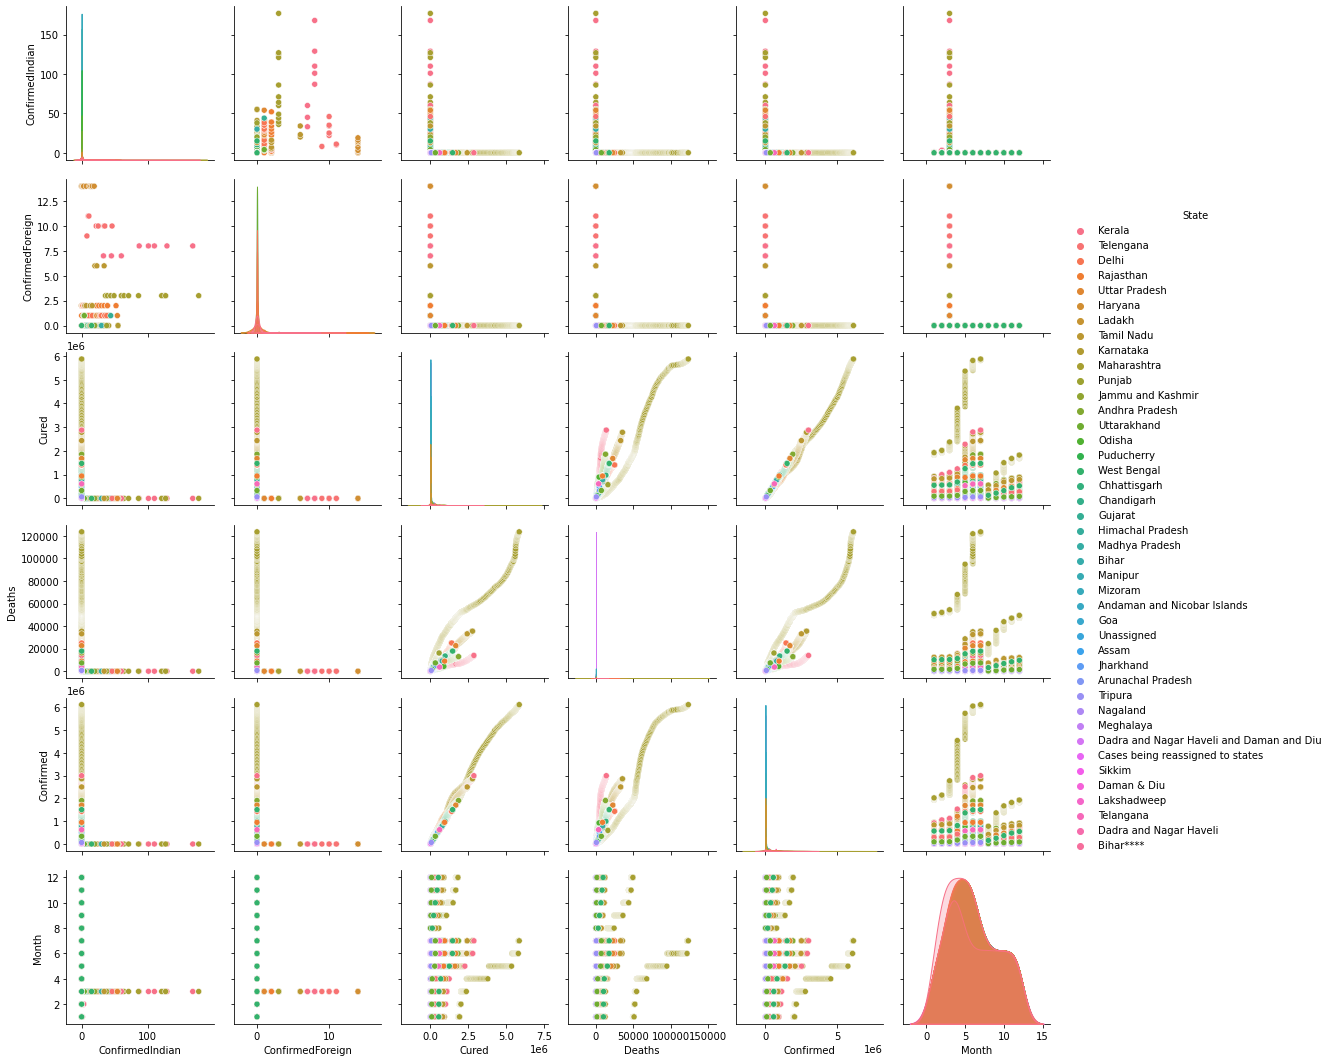

In [28]:
sns.pairplot(d,hue='State')
plt.show()

### Heatmap showing correlation between numeric variables in the dataset 

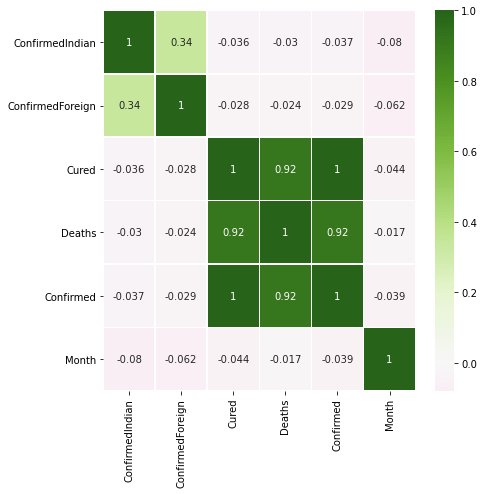

In [29]:
plt.figure(figsize=(7,7))
sns.heatmap(d.corr(), annot=True,linewidth=.5,center=0,cmap='PiYG')
plt.show()

### 15 States with most number of confirmed cases 

In [30]:
d.groupby('State').Confirmed.max().sort_values(ascending=False).head(15)

State
Maharashtra       6113335
Kerala            2996094
Karnataka         2859595
Tamil Nadu        2503481
Andhra Pradesh    1908065
Uttar Pradesh     1706818
West Bengal       1507241
Delhi             1434687
Chhattisgarh       996359
Rajasthan          952836
Odisha             927186
Gujarat            823964
Madhya Pradesh     790042
Haryana            769030
Bihar              722746
Name: Confirmed, dtype: int64

### 15 States with most number of cured cases 

In [31]:
d.groupby('State').Cured.max().sort_values(ascending=False).head(15)

State
Maharashtra       5872268
Kerala            2877557
Karnataka         2784030
Tamil Nadu        2435872
Andhra Pradesh    1861937
Uttar Pradesh     1682130
West Bengal       1472132
Delhi             1408853
Chhattisgarh       977893
Rajasthan          942882
Odisha             897362
Gujarat            811699
Madhya Pradesh     780578
Haryana            758442
Bihar              711913
Name: Cured, dtype: int64

### 15 States with most number of death cases 

In [32]:
d.groupby('State').Deaths.max().sort_values(ascending=False).head(15)

State
Maharashtra       123531
Karnataka          35526
Tamil Nadu         33132
Delhi              25001
Uttar Pradesh      22656
West Bengal        17834
Punjab             16131
Kerala             13960
Chhattisgarh       13462
Andhra Pradesh     12898
Gujarat            10072
Bihar               9612
Haryana             9506
Bihar****           9452
Madhya Pradesh      9017
Name: Deaths, dtype: int64

### Statewise total of all cases 

In [33]:
statewise=d.groupby(['State']).agg({"Confirmed":"max","Cured":"max","Deaths":"max"})                                                                                      
statewise

,Confirmed,Cured,Deaths
State,,,
Andaman and Nicobar Islands,7487,7343,128
Andhra Pradesh,1908065,1861937,12898
Arunachal Pradesh,37879,34525,181
Assam,522267,493306,4717
Bihar,722746,711913,9612
Bihar****,715730,701234,9452
Cases being reassigned to states,9265,0,0
Chandigarh,61752,60837,809
Chhattisgarh,996359,977893,13462


In [34]:
statewise.index # checking the index of dataframe- statewise

Index(['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Bihar****', 'Cases being reassigned to states',
       'Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli',
       'Dadra and Nagar Haveli and Daman and Diu', 'Daman & Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Telengana', 'Tripura', 'Unassigned',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype='object', name='State')

### All case details of 5 states with most number of confirmed cases 

In [35]:
most_confmd=statewise.sort_values(by='Confirmed',ascending=False).head(5)
most_confmd

,Confirmed,Cured,Deaths
State,,,
Maharashtra,6113335,5872268,123531
Kerala,2996094,2877557,13960
Karnataka,2859595,2784030,35526
Tamil Nadu,2503481,2435872,33132
Andhra Pradesh,1908065,1861937,12898


### Pie plot for all cases of 5 states with most number of confirmed cases

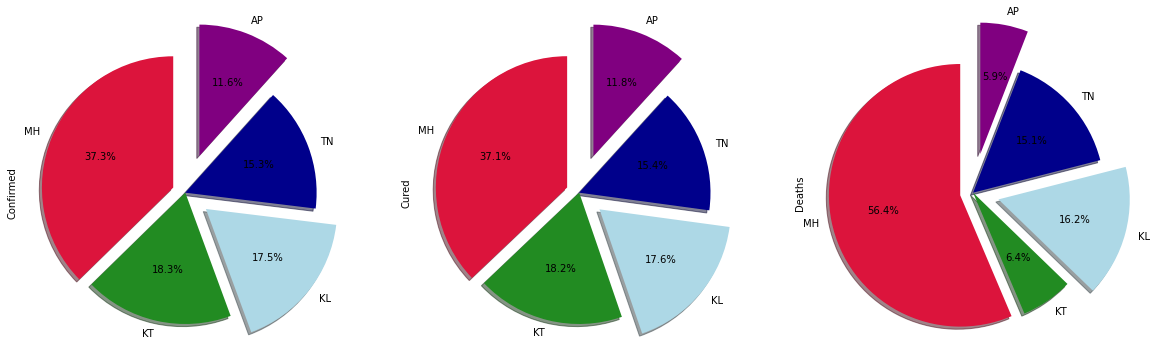

In [36]:
c=('crimson','forestgreen','lightblue','darkblue','purple')
most_confmd.plot(kind='pie', autopct='%1.1f%%', subplots = True,startangle=90,colors=c,shadow=True,explode=(.1,0,.2,0,0.3),
       legend=None,labels=('MH','KT','KL','TN','AP'))
fig = plt.gcf()
fig.set_size_inches(20,7)
plt.show()

### Resetting index for statewise

In [37]:
statewise=statewise.reset_index()
statewise

,State,Confirmed,Cured,Deaths
0,Andaman and Nicobar Islands,7487,7343,128
1,Andhra Pradesh,1908065,1861937,12898
2,Arunachal Pradesh,37879,34525,181
3,Assam,522267,493306,4717
4,Bihar,722746,711913,9612
5,Bihar****,715730,701234,9452
6,Cases being reassigned to states,9265,0,0
7,Chandigarh,61752,60837,809
8,Chhattisgarh,996359,977893,13462
9,Dadra and Nagar Haveli,10377,10261,4


# Machine Learning

### Assigning x variable 

In [38]:
x=statewise.iloc[:,1].values
x

array([   7487, 1908065,   37879,  522267,  722746,  715730,    9265,
         61752,  996359,   10377,   10575,       2, 1434687,  167823,
        823964,  769030,  202945,  317481,  346038, 2859595, 2996094,
         20137,    9947,  790042, 6113335,   73581,   52358,   22155,
         25619,  927186,  118227,  596736,  952836,   21403, 2503481,
        628282,  443360,   68612,      77, 1706818,  340882, 1507241],
      dtype=int64)

### Shape of x 

In [39]:
x.shape

(42,)

### Assigning y variable 

In [40]:
y=statewise.iloc[:,2].values
y

array([   7343, 1861937,   34525,  493306,  711913,  701234,       0,
         60837,  977893,   10261,   10532,       0, 1408853,  162787,
        811699,  758442,  198134,  309554,  340365, 2784030, 2877557,
         19733,    9643,  780578, 5872268,   66132,   47173,   18383,
         23982,  897362,  114673,  578590,  942882,   19200, 2435872,
        613124,  362160,   63964,       0, 1682130,  332006, 1472132],
      dtype=int64)

### Plotting regression plot to see if x and y has a linear relationship

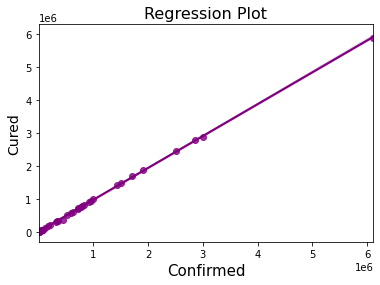

In [41]:
sns.regplot(y=statewise['Cured'],x=statewise['Confirmed'],color='purple')
plt.title('Regression Plot',size=16)
plt.ylabel('Cured',size=14)
plt.xlabel('Confirmed',size=15)
plt.show()

### Note
#### As seen from the regression plot, x and y has a linear relationship. So we can apply linear regression model for this data.

### Creating the linear regression object

In [42]:
reg=linear_model.LinearRegression()

### Fitting the data

In [43]:
reg.fit(statewise[['Confirmed']],statewise.Cured)

LinearRegression()

### Prediction against a given value for x, ie, given value of confirmed case

In [44]:
a=[6113335]
r=reg.predict([a])
print("Confirmed={}".format(a))
print("Predicted cured={}".format(r[0]))

Confirmed=[6113335]
Predicted cured=5906657.52539864


### Reshaping x from single dimension to 2 dimensional array 

In [45]:
x = np.reshape(x, (-1, 1))
x

array([[   7487],
       [1908065],
       [  37879],
       [ 522267],
       [ 722746],
       [ 715730],
       [   9265],
       [  61752],
       [ 996359],
       [  10377],
       [  10575],
       [      2],
       [1434687],
       [ 167823],
       [ 823964],
       [ 769030],
       [ 202945],
       [ 317481],
       [ 346038],
       [2859595],
       [2996094],
       [  20137],
       [   9947],
       [ 790042],
       [6113335],
       [  73581],
       [  52358],
       [  22155],
       [  25619],
       [ 927186],
       [ 118227],
       [ 596736],
       [ 952836],
       [  21403],
       [2503481],
       [ 628282],
       [ 443360],
       [  68612],
       [     77],
       [1706818],
       [ 340882],
       [1507241]], dtype=int64)

In [46]:
x.shape

(42, 1)

### Predicting cured cases for x 

In [47]:
p=reg.predict(x)
pd.DataFrame(p)

,0
0,1.014492e+04
1,1.845563e+06
2,3.949495e+04
3,5.072760e+05
4,7.008817e+05
5,6.941062e+05
6,1.186196e+04
7,6.254948e+04
8,9.651140e+05
9,1.293584e+04


### Converting x back to single dimension 

In [48]:
singlex=x.flatten()
singlex

array([   7487, 1908065,   37879,  522267,  722746,  715730,    9265,
         61752,  996359,   10377,   10575,       2, 1434687,  167823,
        823964,  769030,  202945,  317481,  346038, 2859595, 2996094,
         20137,    9947,  790042, 6113335,   73581,   52358,   22155,
         25619,  927186,  118227,  596736,  952836,   21403, 2503481,
        628282,  443360,   68612,      77, 1706818,  340882, 1507241],
      dtype=int64)

### Dataframe for predicted values against actual for a given x values

In [49]:
d1=pd.DataFrame({'Confirmed':singlex,'Actual Cured':statewise['Cured'],'Predicted Cured':p})
pd.options.display.float_format = '{:.2f}'.format # Converting from exponential to integer
d1

,Confirmed,Actual Cured,Predicted Cured
0,7487,7343,10144.92
1,1908065,1861937,1845562.72
2,37879,34525,39494.95
3,522267,493306,507275.99
4,722746,711913,700881.69
5,715730,701234,694106.23
6,9265,0,11861.96
7,61752,60837,62549.48
8,996359,977893,965114.03
9,10377,10261,12935.84


### Regression plot for Predicted values against x 

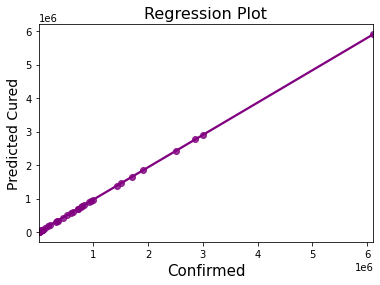

In [50]:
sns.regplot(y=p,x=singlex,color='Purple')
plt.title('Regression Plot',size=16)
plt.ylabel('Predicted Cured',size=14)
plt.xlabel('Confirmed',size=15)
plt.show()

# Conclusion
#### Using the linear regression model I was able to predit the number of cured cases for corresponding number confirmed cases. So using this model we can predict the number of people who will be cured in future, for a number of people who would beconfirmed with the infection in future.